In [17]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv('../data-101/offenses_new_york_city_2013.csv')

In [19]:
df.columns = ['City', 'Population', 'Violent_crime', 'Murder', 'Rape', 'Rape2', 'Robbery', 'Agg_assault', 
              'Property_crime', 'Burglary', 'Larceny_theft', 'MV_theft', 'Arson3']

In [20]:
df.head()

,City,Population,Violent_crime,Murder,Rape,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,MV_theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [21]:
print(df[df.Population > 300000])

         City  Population  Violent_crime  Murder  Rape  Rape2  Robbery  \
216  New York     8396126          52384     335   NaN   1112    19170   

     Agg_assault  Property_crime  Burglary  Larceny_theft  MV_theft  Arson3  
216        31767          141971     16606         117931      7434     NaN  


In [22]:
# clean Dataset
df_clean = pd.DataFrame()
df_clean = df.drop(['Rape', 'Arson3'], axis=1)
df_clean = df_clean.drop([216], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


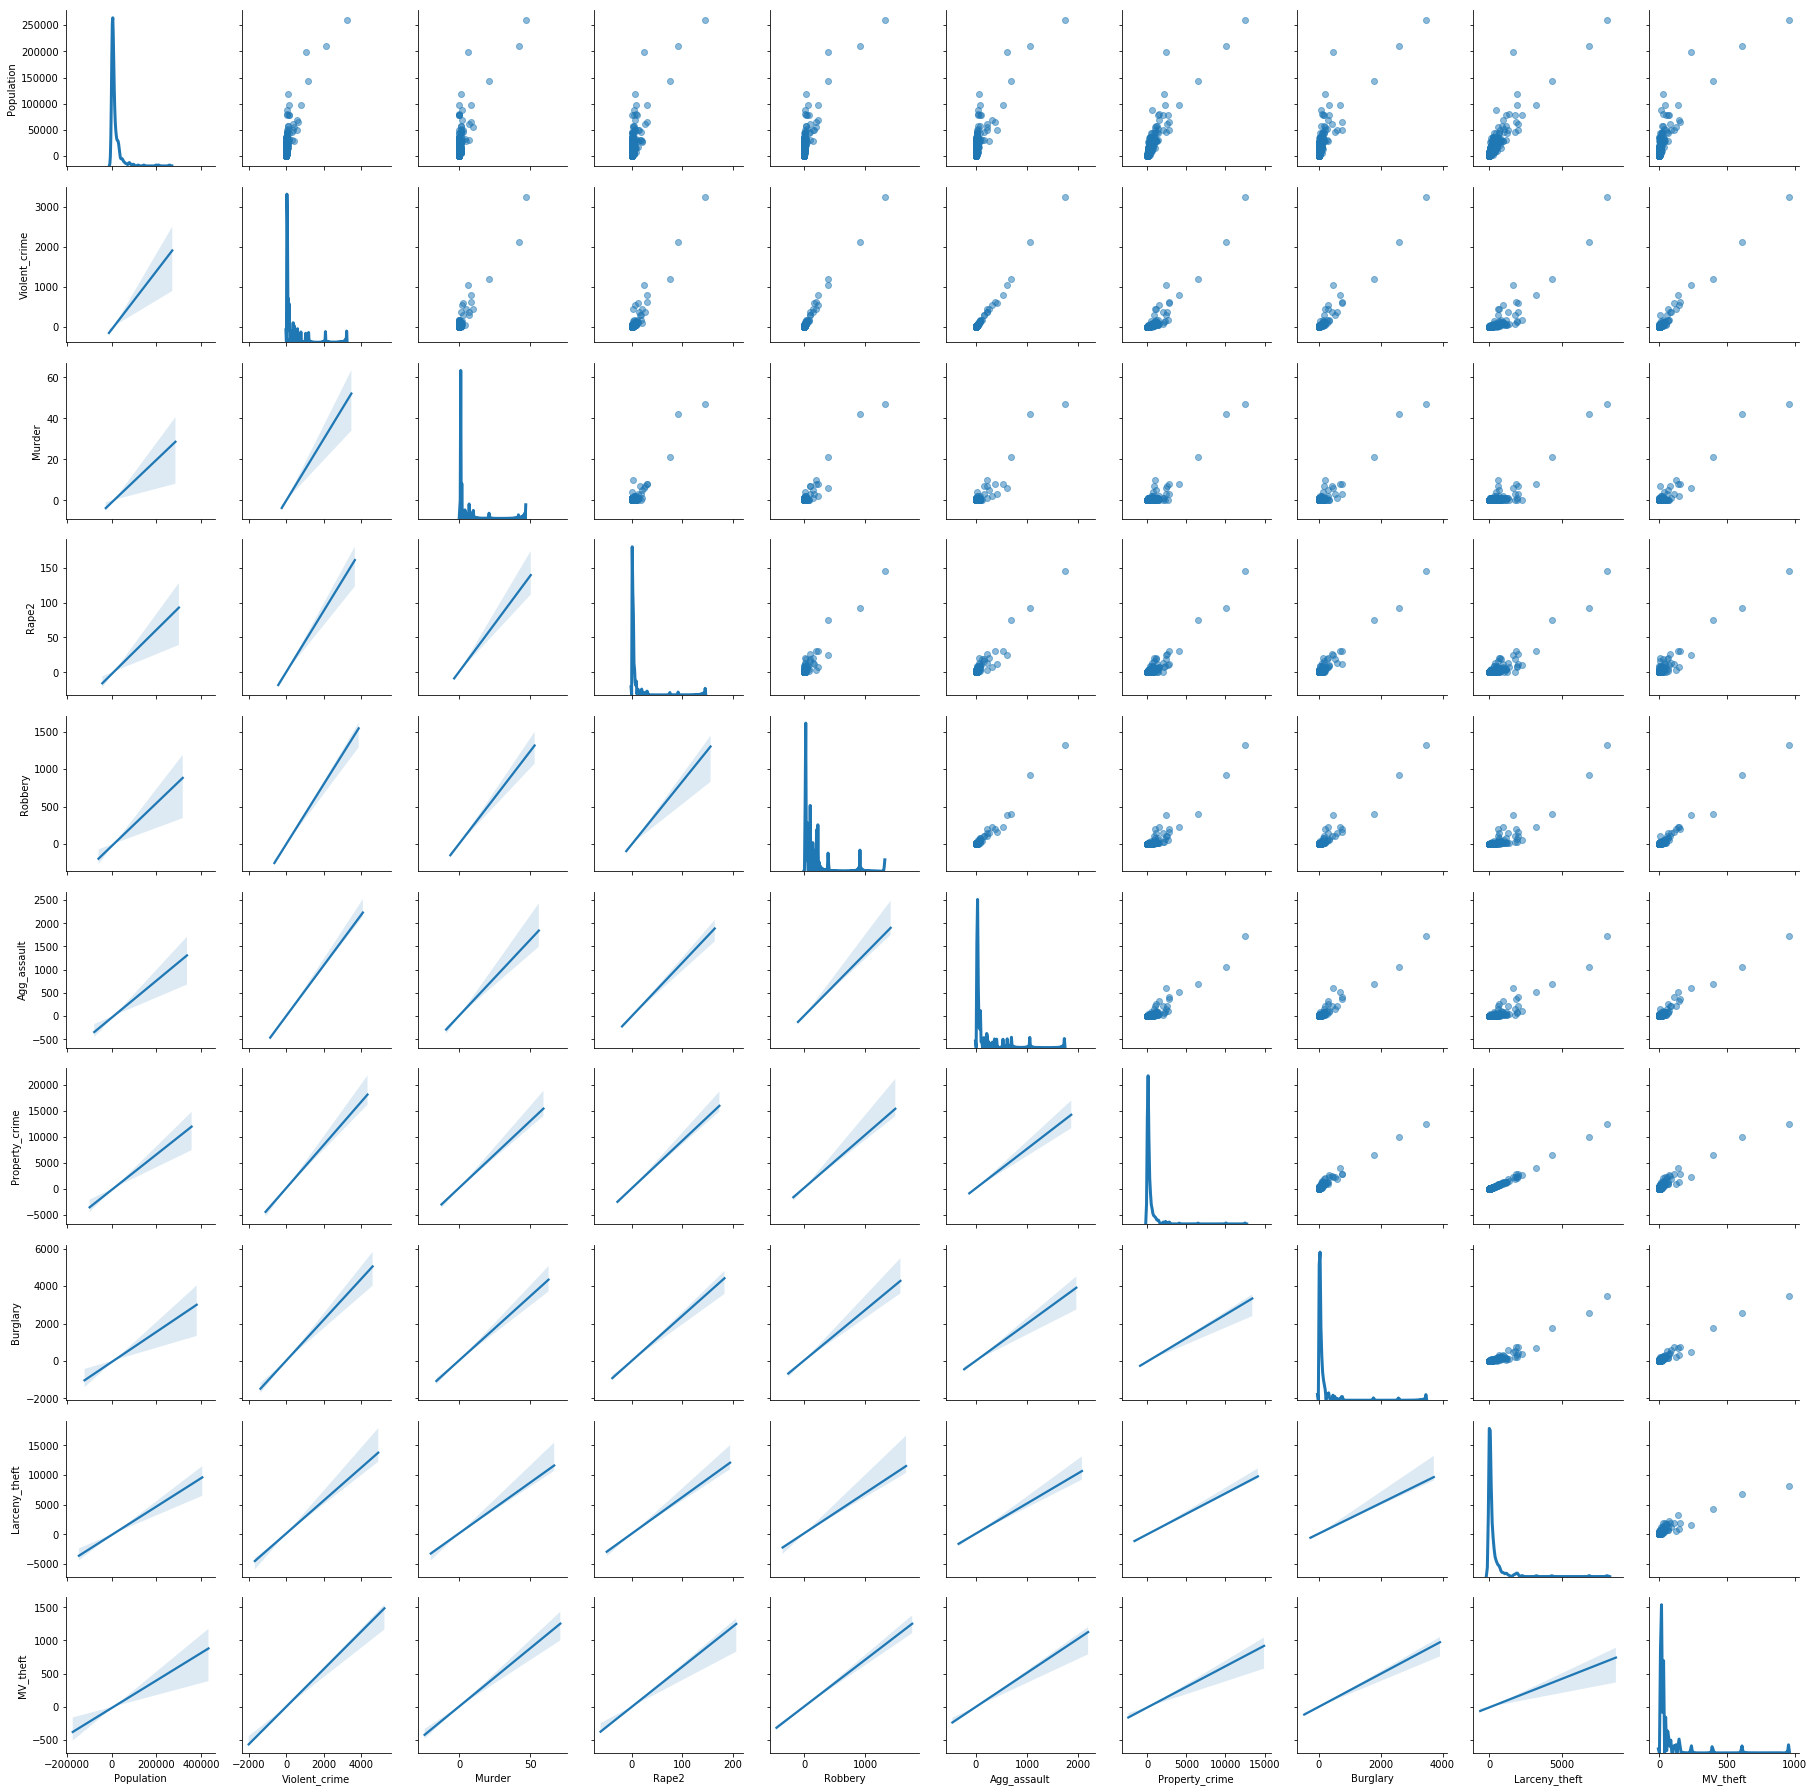

In [23]:
# scan data with univariate & bivariate methods
graph = sns.PairGrid(df_clean, diag_sharey=False)
graph.map_upper(plt.scatter, alpha=0.5)
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [26]:
x = pd.DataFrame()
y = pd.DataFrame()
x['Population'] = df_clean['Population']
x['Population2'] = [x*x for x in x['Population'].tolist()]
x['Murder'] = df_clean['Murder'].apply(lambda x: 1 if x > 0 else 0)
x['Robbery'] = df_clean['Robbery'].apply(lambda x: 1 if x > 0 else 0)
y['Property_crime'] = df_clean['Property_crime']

In [27]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(model.coef_)
print(model.intercept_)
print('The model RSquared = {}'.format(model.score(x, y)))

[[1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]]
[-16.81586632]
The model RSquared = 0.8444937611173492
